In [1]:
# -*- coding: utf-8 -*-

In [2]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os

In [3]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (20, 10)

# RETRIEVING AND BASIC FORMATTING EXCEL FILES

## Retrieving the .xlsx files
Find the directory where the excel files are living. 

Then **'excel_files'** will report what lives inside the folder. 

Note: Any additional excel files you want analysed will need to be put into the same location as **'directory'.**

In [4]:
directory = r"\\dc2-file001\Practice\InfoTech\BIM\Revit\RevitStandardsMasterBVN\02_BVN_Library\Master Content\X_Data\Data - ARR\_CONSOLIDATED v3"
files = os.listdir(directory)
excel_files = []
for f in files:
    if ".xlsx" in f:
        excel_files.append(f)
excel_files

['20170706 12_20 Family Types Log.xlsx',
 '20170706 12_20 FamilyCategory Log.xlsx',
 '20170706 12_20 FamilySubCategory Log.xlsx',
 '20170706 12_20 Host Families Log.xlsx',
 '20170706 12_20 Materials Log.xlsx',
 '20170706 12_20 Nested Families Log.xlsx',
 '20170706 12_20 OmniClass Log.xlsx',
 '20170706 12_20 Parameters Log.xlsx',
 '20170706 12_20 ParameterValuesByTypes Log.xlsx',
 '20170706 12_20 Reference Planes Log.xlsx',
 '20170706 12_20 Units Log.xlsx']

## xlsx. key and values

Use <b>keys</b> to pair each key with each excel file in <b>excel_files</b>. This is so that you don't have to type the long file name everytime you need to call it in the rest of the code. 

<b>file_dict</b> will tell you which excel file is paired with each key.

In [8]:
keys = [
        "FamilyTypes",
        "FamilyCategory",
        "FamilySubCategory",
        "HostFamilies",
        "Materials",
        "NestedFamilies",
        "Omniclass",
        "Parameters",
        "ParameterValuesByTypes",
        "ReferencePlanes",
        "Units",
        
       ]

file_dict = {key: value for (key, value) in zip(keys, excel_files)}
file_dict

{'FamilyCategory': '20170706 12_20 FamilyCategory Log.xlsx',
 'FamilySubCategory': '20170706 12_20 FamilySubCategory Log.xlsx',
 'FamilyTypes': '20170706 12_20 Family Types Log.xlsx',
 'HostFamilies': '20170706 12_20 Host Families Log.xlsx',
 'Materials': '20170706 12_20 Materials Log.xlsx',
 'NestedFamilies': '20170706 12_20 Nested Families Log.xlsx',
 'Omniclass': '20170706 12_20 OmniClass Log.xlsx',
 'ParameterValuesByTypes': '20170706 12_20 ParameterValuesByTypes Log.xlsx',
 'Parameters': '20170706 12_20 Parameters Log.xlsx',
 'ReferencePlanes': '20170706 12_20 Reference Planes Log.xlsx',
 'Units': '20170706 12_20 Units Log.xlsx'}

## FUNCTIONS TO FORMAT EXCEL FILES

### Removing the common file path characters from original family file path name

The example file path below is very long. In order to cut the fat out of the long file path, the common characters from each file path is removed. 

\\dc2-file001\Practice\InfoTech\BIM\Revit\RevitStandardsMasterBVN\02_BVN_Library\Master Content\Windows\Double Hung\Double Hung_3 Panel.rfa

Therefore, the start of the file path **\\dc2-file001\Practice\InfoTech\BIM\Revit\RevitStandardsMasterBVN\02_BVN_Library\Master Content** is removed in every spreadsheet.

### Removing the rfa. name from FamilyFilePath.

In the excel files, the family name (.rfa) is part of the FamilyFilePath column.

e.g. \\dc2-file001\Practice\InfoTech\BIM\Revit\RevitStandardsMasterBVN\02_BVN_Library\Master Content\Windows\Special\<u>Window Lancet_basic.rfa</u>

### Determines whether the family is an .rfa or from a .txt catalogue file.

<b> remove_rfaName</b> removes the family name from the FamilyFilePath column. This allows us to find things such as the count of how many families there are within a particular master content folder. It splits the <b>full_filepath</b> path by each \ .

<b>joined_again</b> will join the file path back through the \ except for the last one. The new file path is appended on a FamilyFilePath column.

### Determines whether the family is an .rfa or from a .txt catalogue file.
<b>getFileType</b> removes the last three characters from the FamilyFilePath.

<b>stripFileType</b> removes the last four characters (including the '.') from the FamilyName.

In [9]:
commonPartofFilePath = len(r'\\dc2-file001\Practice\InfoTech\BIM\Revit\RevitStandardsMasterBVN\02_BVN_Library\Master Content')
print commonPartofFilePath
def stripCommonPath(row):
        return row.FamilyFilePath[commonPartofFilePath+1:]
    
def host_stripCommonPath(row):
        return row.HostFamilyFilePath[commonPartofFilePath+1:]

def host_remove_rfaName(row):
    full_filepath = row.HostFamilyFilePath
    split = full_filepath.split("\\")[:-1]
    joined_again = ("\\".join(split))
    return  joined_again

def host_getFileType(row):
    return row.HostFamilyFilePath[-3:]

def host_stripFileType(row):
    return row.HostFamilyName[:-4]

def makeNewColNames(colNames):
    c = list(colNames)
    return [stripHost(n) for n in colNames]

def stripHost(colName):
    if colName[:4] == "Host":
        return colName[4:]
    else:
        return colName

95


# HOST AND NESTED FAMILIES

<b>nf_path</b> and <b>nf</b> reads the data from the Nested Families excel file

In [11]:
nf_path = os.path.join(directory, file_dict["NestedFamilies"])
nf = pd.read_excel(nf_path)

nf["HostFamilyFilePath"] = nf.apply(host_stripCommonPath, axis=1)
nf["HostFamilyName"] = nf.apply(host_stripFileType, axis=1)
nf["FileType"] = nf.apply(host_getFileType, axis=1)
nf["HostFamilyFilePath"] = nf.apply(host_remove_rfaName, axis=1)

nf.drop(["NestedFamilyAction", "NestedFamilyActionParameter_One", "NestedFamilyActionParameter_Two"],axis=1,inplace=True)

nf.head()

,HostFamilyFilePath,HostFamilyName,NestedFamilyName,NestedFamilyType,NoOfInstances,NestedFamilyCategory,FileType
0,Windows\Sliding,Sliding_Single Row_XOX_WIN,X_WN_Sngl_SidePanel_FullFrame,Type1,2,Windows,rfa
1,Windows\Sliding,Sliding_Single Row_XOX_WIN,X_SlidingArrow,Type1,4,Detail Items,rfa
2,Windows\Sliding,Sliding_Single Row_XOOX_WIN,X_WN_Sngl_SidePanel_FullFrame,Type1,2,Windows,rfa
3,Windows\Sliding,Sliding_Single Row_XOOX_WIN,X_SlidingArrow,Type1,4,Detail Items,rfa
4,Windows\Sliding,Sliding_Single Row_XO_WIN,X_WN_Sngl_Sliding_SidePanel_FullFrame,Type1,1,Windows,rfa


## No. of Nested Families

**nf_counts** will count the number of nested families there are in a family.

In [12]:
hostandNest = nf[["HostFamilyName", "NestedFamilyName"]]

hostandNest.head()

,HostFamilyName,NestedFamilyName
0,Sliding_Single Row_XOX_WIN,X_WN_Sngl_SidePanel_FullFrame
1,Sliding_Single Row_XOX_WIN,X_SlidingArrow
2,Sliding_Single Row_XOOX_WIN,X_WN_Sngl_SidePanel_FullFrame
3,Sliding_Single Row_XOOX_WIN,X_SlidingArrow
4,Sliding_Single Row_XO_WIN,X_WN_Sngl_Sliding_SidePanel_FullFrame


In [13]:
nest_grouped = hostandNest.groupby("HostFamilyName").agg(['count'])

nest_grouped.head()

,NestedFamilyName
,count
HostFamilyName,
1 Bay Window,20
1 Bay Window - Non Hosted,12
10P_Perimeter_Bench_FYS,5
12P_Meeting_FYS,6
14P_Meeting_Rectangle_FYS,6


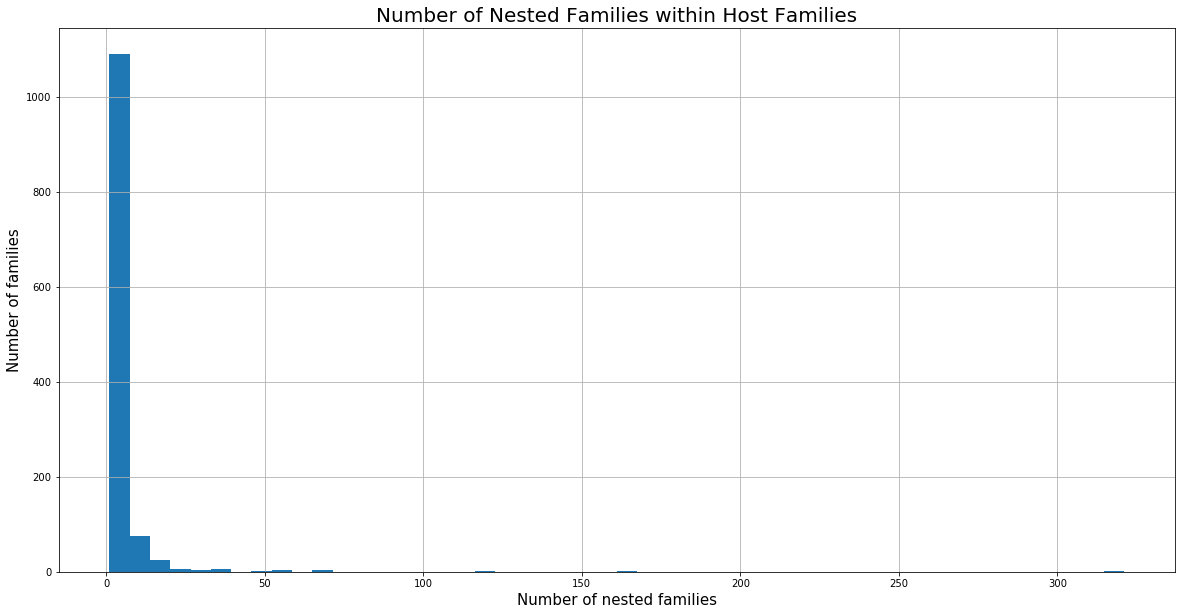

In [14]:
nest_grouped["NestedFamilyName"].hist(bins=50);
plt.title("Number of Nested Families within Host Families", fontsize=20)
plt.xlabel("Number of nested families", fontsize=15)
plt.ylabel("Number of families", fontsize=15)
plt.show()

## No. of Nested Families (Worst Offenders)

In [15]:
nf_counts = nest_grouped["NestedFamilyName"]
nf_counts[nf_counts["count"]>30]

,count
HostFamilyName,
BVN-2016-Casework,162
BVN-2017-Casework,162
BVN-Casework - ALL - FAMILY,321
Bathroom Standard Types 1,39
Bathroom Standard Types 2,36
Bathroom Standard Types 3,37
Bathroom Standard Types 4,32
J-BPR - Bottle Prep,50
J-CFB - Craft Bench,39


## Nested Families with high number of instances

In [16]:
instances = nf[["HostFamilyName", "NestedFamilyName", "NoOfInstances"]]

instances.head()

,HostFamilyName,NestedFamilyName,NoOfInstances
0,Sliding_Single Row_XOX_WIN,X_WN_Sngl_SidePanel_FullFrame,2
1,Sliding_Single Row_XOX_WIN,X_SlidingArrow,4
2,Sliding_Single Row_XOOX_WIN,X_WN_Sngl_SidePanel_FullFrame,2
3,Sliding_Single Row_XOOX_WIN,X_SlidingArrow,4
4,Sliding_Single Row_XO_WIN,X_WN_Sngl_Sliding_SidePanel_FullFrame,1


In [17]:
high_instance = instances[instances.NoOfInstances>50]

high_instance.head(10)

,HostFamilyName,NestedFamilyName,NoOfInstances
787,Pool Waterpolo Field_SEQ,Pool Robes,134
788,Pool Waterpolo Field_SEQ,Pool Robes,134
3862,Louvers_Holyoak with Drain Rail_CUR,Louvre Blade - Hollyoak With Drain Rail,53
3865,Louvers 25mm Framed (Plant Room)_CUR,Louvre Blade - 25wx25h,159
4483,BVN-Casework - ALL - FAMILY,COM_Shelf_Typical_CAS,157
4484,BVN-Casework - ALL - FAMILY,COM_Kickplate_Typical_CAS,71
4485,BVN-Casework - ALL - FAMILY,COM_Panel_Flush_CAS,219
4486,BVN-Casework - ALL - FAMILY,COM_Drawer_Typical_CAS,111
4487,BVN-Casework - ALL - FAMILY,COM_Swing_Typical_CAS,137
4496,BVN-Casework - ALL - FAMILY,COM_Handle_Square D 160mm,200


In [18]:
instance_grouped = instances.groupby("HostFamilyName").agg(['count'])

instance_grouped.head()

,NestedFamilyName,NoOfInstances
,count,count
HostFamilyName,,
1 Bay Window,20,20
1 Bay Window - Non Hosted,12,12
10P_Perimeter_Bench_FYS,5,5
12P_Meeting_FYS,6,6
14P_Meeting_Rectangle_FYS,6,6


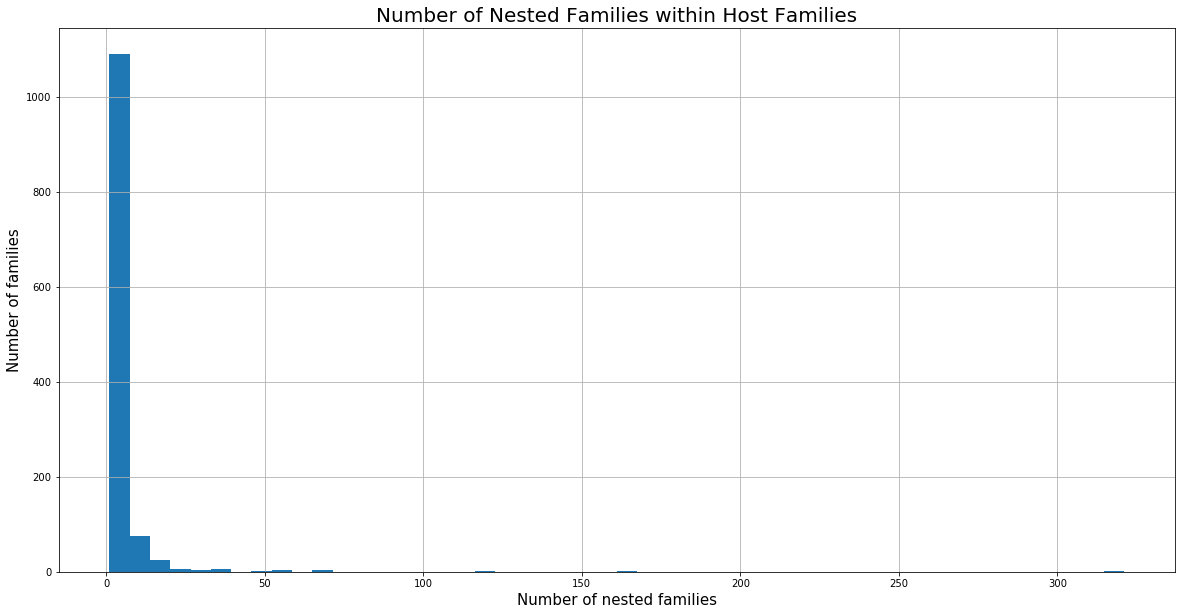

In [19]:
instance_grouped["NestedFamilyName"].hist(bins=50);
plt.title("Number of Nested Families within Host Families", fontsize=20)
plt.xlabel("Number of nested families", fontsize=15)
plt.ylabel("Number of families", fontsize=15)
plt.show()